Simple numerical integration with evenly spaced points is called Newton-Coles Quadrature found here: https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas



In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Rectangle, Trapezoidal and Simpson's Rule for Integration

Rectangle: $I_{r} = f(a)(b-a)$

Trapezoidal: $I_{t} = \frac{b-a}{2} (f(a)+f(b)) $

Simpson's: $I_{s} = \frac{b-a}{6} \left( f(a) +4 f(\frac{a+b}{2}) + f(b) \right)$

Integrate $f(x) = 1 + \frac{x}{4} \sin(\pi x) $ on the interval $[\frac{1}{2}, \frac{3}{2}]$

In [5]:
#define the function

def f(x):
  return 1 + 0.25 * x * np.sin(np.pi*x)

In [6]:
#set endpoints of integration interval

a = 0.5
b = 1.5

In [7]:
#compute the three types of integration

I_r = f(a) * (b - a)
I_t = 0.5 * (f(a) + f(b)) * (b - a)
I_s = (b - a) / 6.0 * (f(a) + 4 * f((a + b)/2) + f(b))

In [8]:
#analytic solution found by integrating the function in Maple int(f,x)

def A(x):
  return (x + (np.sin(np.pi * x) - x * np.pi * np.cos(np.pi * x))/ (4 * np.pi**2))

I_a = A(b) - A(a)

In [9]:
print(I_r, I_s, I_t, I_a)

1.125 0.9583333333333333 0.875 0.9493394081788312


# Composite Integration

Trapezoid: $ \int^{b}_{a} f(x) dx = \frac{\Delta x}{2} \displaystyle\sum_{i=1}^{N-1} (f_{i} + f_{i+1}) + \mathcal{O}(\Delta x^{2})  $

Simpson's: $ \int^{b}_{a} f(x) dx = \frac{\Delta x}{3} \displaystyle\sum_{i=0}^{\frac{N}{2}-1} (f_{2i} + 4f_{2i+1} + f_{2i+2}) + \mathcal{O}(\Delta x^{4}) $

For the same function as above we will do the trapezoidal and simposon's composite rule for integration with N = 2, 4, 6, 8, 16, 32

Compute the error w.r.t. the analytic solution and plot the error vs. N for both methods

In [10]:
#Trapezoidal Composite Integration

def I_t(x):
  N = len(x) - 1
  I = 0.0
  for n in range(N):
      I += 0.5 * (x[n+1] - x[n]) * (f(x[n]) + f(x[n+1]))
  return I

In [11]:
#Simpson's Composite Integration

def I_s(x):
  N = len(x) - 1
  I = 0.0
  #Go through the range by two to account for the range of the sum
  for n in range(0, N, 2):
    dx = x[n+1] - x[n]
    I += dx/3.0 * (f(x[n]) + 4 * f(x[n+1]) + f(x[n+2]))
  return I

In [12]:
#integration bounds same as above

a = 0.5
b = 1.5

In [13]:
#number of partitions for integration
N = [2, 4, 8, 16, 32, 64, 128, 256]

In [14]:
#Analytic solution defined above

I_a

0.9493394081788312

In [15]:
#keep track of the errors for each N

err_trap = []
err_simps = []

for nbins in N:
  # x values (including rightmost point)
  x = np.linspace(a, b, nbins+1)

  err_trap.append(np.abs(I_t(x) - I_a))
  err_simps.append(np.abs(I_s(x) - I_a))

In [16]:
# Make these error arrays into numpy arrays so we can do math in them

err_trap = np.asarray(err_trap)
err_simps = np.asarray(err_simps)
N = np.asarray(N)

Text(0, 0.5, 'error')

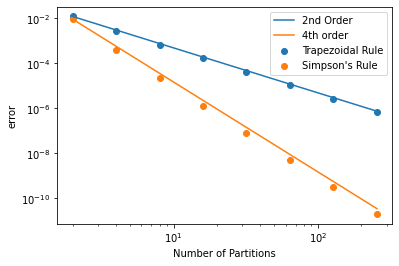

In [17]:
# plot the results

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(N, err_trap, label="Trapezoidal Rule")
ax.scatter(N, err_simps, label="Simpson's Rule")

# compute ideal scaling: err = err_0 (N_0 / N) ** order

fourth_order = err_simps[0] * (N[0]/N)**4
second_order = err_trap[0] *(N[0]/N)**2

ax.plot(N, second_order, label="2nd Order")
ax.plot(N, fourth_order, label = "4th order")

ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()
ax.set_xlabel("Number of Partitions")
ax.set_ylabel("error")

# More Exercises and Special Cases